In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Histogram Plots

In [2]:
def plot_histogram(image, title):
    bins = np.linspace(0, 255)
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.hist(image.ravel(), bins=bins, range=[0,256] , color='orange', edgecolor="black" , alpha=0.75)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [3]:
def histogram_equalization(image):
    image = np.array(image) # convert list to numpy array
    bins = np.linspace(0, 256 , 6) # 5 bins for 256 values
    hist, _ = np.histogram(image.flatten(), bins=bins, density=True) # histogram of the image
    cdf = hist.cumsum() # cumulative distribution function
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min()) # normalize the CDF

    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized) # equalize the image using the CDF
    equalized_image = equalized_image.reshape(image.shape) # reshape to original image shape
    return equalized_image.astype(np.uint8) # convert to uint8 type

In [4]:
dark_image = cv2.imread("Images/hist9(dark).bmp") 
light_image = cv2.imread("Images/hist2(light).bmp") 
low_contrast = cv2.imread("Images/hist1(low_contrast).bmp") 
high_contrast = cv2.imread("Images/hist4(high_contrast).bmp") 

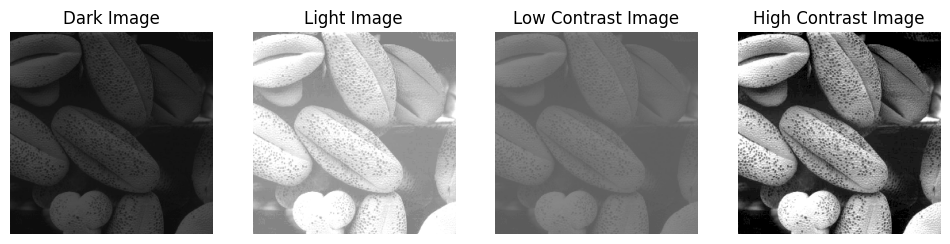

In [5]:
images = [(dark_image, "Dark Image"), 
          (light_image, "Light Image"), 
          (low_contrast, "Low Contrast Image"), 
          (high_contrast, "High Contrast Image")]
plt.figure(figsize=(12, 8))
for i, (image, title) in enumerate(images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

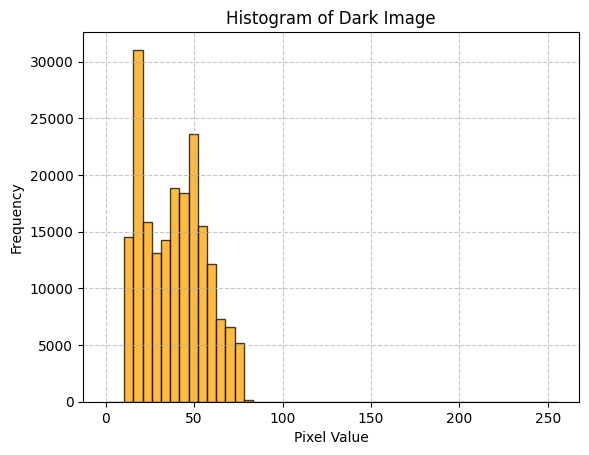

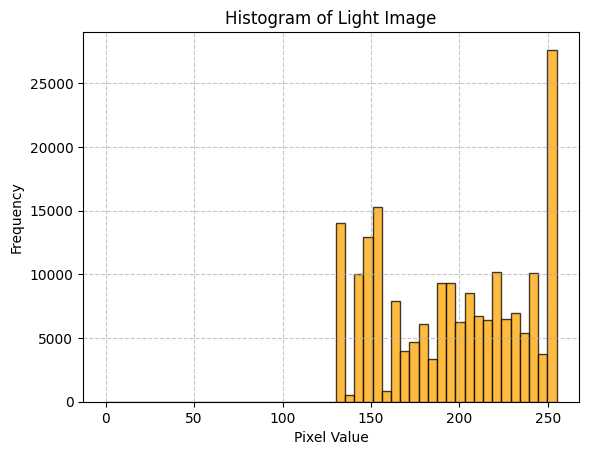

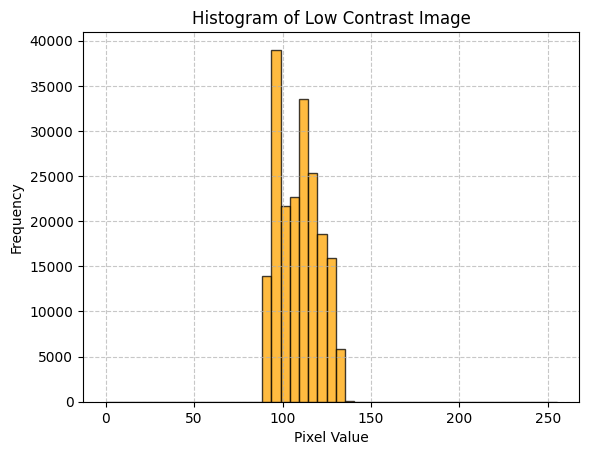

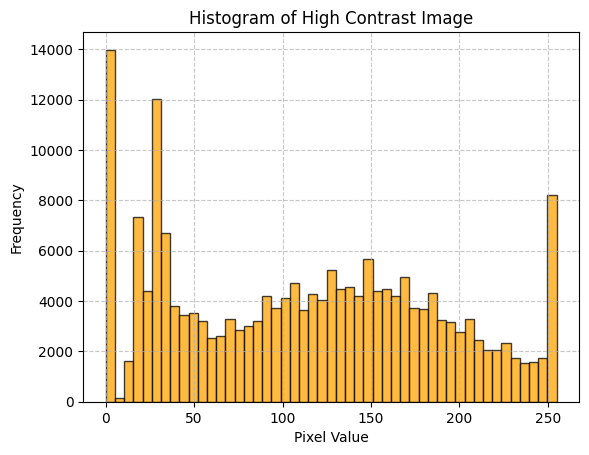

In [6]:
plt.figure(figsize=(12, 8))
for image, title in images:
    plot_histogram(image, f"Histogram of {title}")

# Histogram Equalization

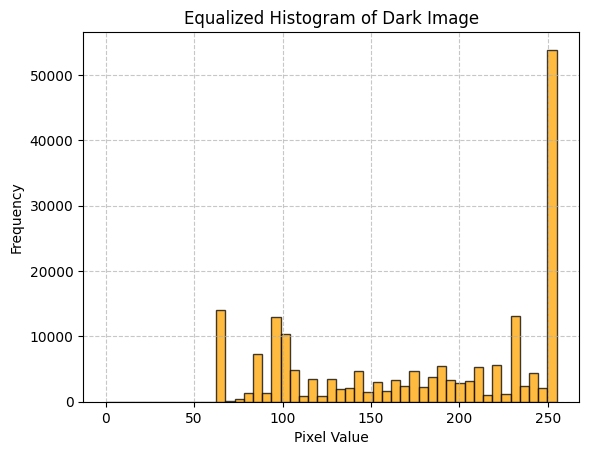

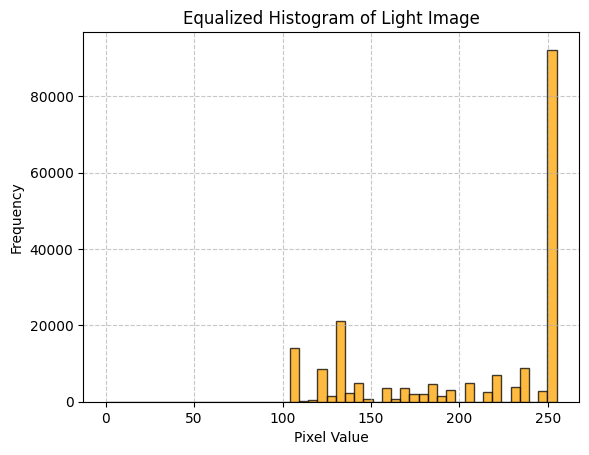

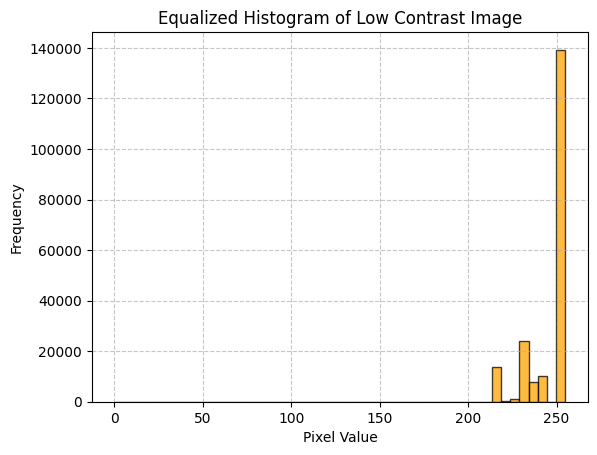

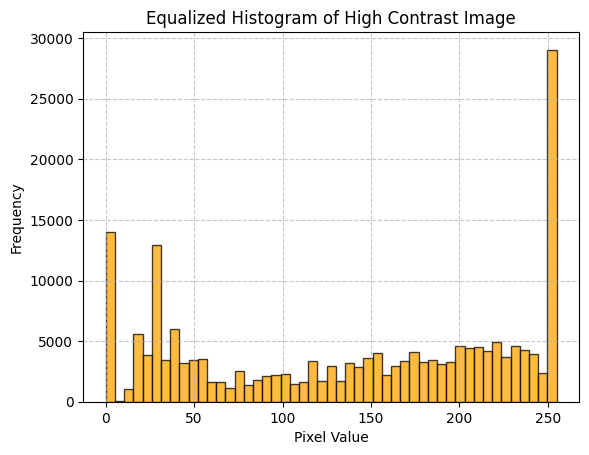

In [7]:
for img, title in images:
    equalized_img = histogram_equalization(img)
    plot_histogram(equalized_img, f"Equalized Histogram of {title}")